### GRUPO 17

JAVIER GÓMEZ MORALEDA

MARIO ALCOLEA ALCOLEA

# Práctica 1C - Inteligencia Artificial
## Belén Díaz Agudo -  Facultad de Informática UCM
## Búsqueda local
En esta primera parte usaremos ejercicios paso a paso para familiarizarnos con la resolución de problemas sencillos de optimización, como la maximización o minimización de una función, o el problema de la mochila o del viajante, problemas conocidos cuya resolución se ha abordado con técnicas algorítmicas y que vamos a resolver utilizando algoritmos de búsqueda local. En la segunda parte de la práctica se pide resolver el problema de la organización de jornadas informáticas dado en el enunciado.

## Parte 1. Algoritmo de escalada
Hill Climbing es un algoritmo de búsqueda local heurística utilizada para problemas de optimización.
Esta solución puede o no ser el óptimo global. El algoritmo es una variante del algoritmo de generación y prueba.
<br>
En general, el algoritmo funciona de la siguiente manera:
- Evaluar el estado inicial.
- Si es igual al estado del objetivo, terminamos.
- Encuentra un estado vecino al estado actual
- Evaluar este estado. Si está más cerca del estado objetivo que antes, reemplace el estado inicial con este estado y repita estos pasos.
<br>
Usaremos la implementación de AIMA que está en el módulo search.py

    def hill_climbing(problem):
        """From the initial node, keep choosing the neighbor with highest value,
        stopping when no neighbor is better. [Figure 4.2]"""
        current = Node(problem.initial)
        while True:
            neighbors = current.expand(problem)
            if not neighbors:
                break
            neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
            if problem.value(neighbor.state) <= problem.value(current.state):
                break
            current = neighbor
        return current.state


### TSP (Travelling Salesman Problem): el problema del viajante
Dado un conjunto de ciudades y la distancia entre cada par de ciudades, el problema es encontrar la ruta más corta posible que visite cada ciudad exactamente una vez y regrese al punto de partida. Es un problema NP hard. No existen una solución de coste polinomial. 

In [1]:
##Resolvereremos el problema del viajante TSP para encontrar una solución aproximada.
from search import *

class TSP_problem(Problem):

    def two_opt(self, state):
        """ Neighbour generating function for Traveling Salesman Problem """
        neighbour_state = state[:]
        left = random.randint(0, len(neighbour_state) - 1)
        right = random.randint(0, len(neighbour_state) - 1)
        if left > right:
            left, right = right, left
        neighbour_state[left: right + 1] = reversed(neighbour_state[left: right + 1])
        return neighbour_state

    def actions(self, state):
        """ action that can be excuted in given state """
        return [self.two_opt]

    def result(self, state, action):
        """  result after applying the given action on the given state """
        return action(state)

    def path_cost(self, c, state1, action, state2):
        """ total distance for the Traveling Salesman to be covered if in state2  """
        cost = 0
        for i in range(len(state2) - 1):
            cost += distances[state2[i]][state2[i + 1]]
        cost += distances[state2[0]][state2[-1]]
        return cost

    def value(self, state):
        """ value of path cost given negative for the given state """
        return -1 * self.path_cost(None, None, None, state)

In [2]:
## Resolveremos el TSP para las ciudades de la lista de ciudades de Rumanía.
## ['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']

In [3]:
# Usaremos la siguiente representacion del libro AIMA para el mapa de Rumanía.

romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

Es bastante sencillo entender este `romania_map`. El primer nodo ** Arad ** tiene tres vecinos llamados ** Zerind **, ** Sibiu **, ** Timisoara **. Cada uno de estos nodos son 75, 140, 118 unidades aparte de ** Arad ** respectivamente. Y lo mismo ocurre con otros nodos.

Y `romania_map.locations` contiene las posiciones de cada uno de los nodos. 
Como heurística se puede usar la distancia en línea recta o la distancia manhattan (que es diferente de la proporcionada en `romania_map`) entre dos ciudades.

In [4]:
romania_locations = romania_map.locations
print(romania_locations)

{'Arad': (91, 492), 'Bucharest': (400, 327), 'Craiova': (253, 288), 'Drobeta': (165, 299), 'Eforie': (562, 293), 'Fagaras': (305, 449), 'Giurgiu': (375, 270), 'Hirsova': (534, 350), 'Iasi': (473, 506), 'Lugoj': (165, 379), 'Mehadia': (168, 339), 'Neamt': (406, 537), 'Oradea': (131, 571), 'Pitesti': (320, 368), 'Rimnicu': (233, 410), 'Sibiu': (207, 457), 'Timisoara': (94, 410), 'Urziceni': (456, 350), 'Vaslui': (509, 444), 'Zerind': (108, 531)}


In [5]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

In [6]:
from IPython.display import HTML
from IPython.display import display
from PIL import Image
from matplotlib import lines
import ipywidgets as widgets
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [7]:
def show_map(graph_data, node_colors=None):
    G = nx.Graph(graph_data['graph_dict'])
    node_colors = node_colors or graph_data['node_colors']
    node_positions = graph_data['node_positions']
    node_label_pos = graph_data['node_label_positions']
    edge_weights = graph_data['edge_weights']

    # set the size of the plot
    plt.figure(figsize=(18, 13))
    # draw the graph (both nodes and edges) with locations from romania_locations
    nx.draw(G, pos={k: node_positions[k] for k in G.nodes()},
            node_color=[node_colors[node] for node in G.nodes()], linewidths=0.3, edgecolors='k')

    # draw labels for nodes
    node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=14)

    # add a white bounding box behind the node labels
    [label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    # add edge lables to the graph
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_weights, font_size=14)

    # add a legend
    white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="white")
    orange_circle = lines.Line2D([], [], color="orange", marker='o', markersize=15, markerfacecolor="orange")
    red_circle = lines.Line2D([], [], color="red", marker='o', markersize=15, markerfacecolor="red")
    gray_circle = lines.Line2D([], [], color="gray", marker='o', markersize=15, markerfacecolor="gray")
    green_circle = lines.Line2D([], [], color="green", marker='o', markersize=15, markerfacecolor="green")
    plt.legend((white_circle, orange_circle, red_circle, gray_circle, green_circle),
               ('Un-explored', 'Frontier', 'Currently Exploring', 'Explored', 'Final Solution'),
               numpoints=1, prop={'size': 16}, loc=(.8, .75))

    # show the plot. No need to use in notebooks. nx.draw will show the graph itself.
    plt.show()

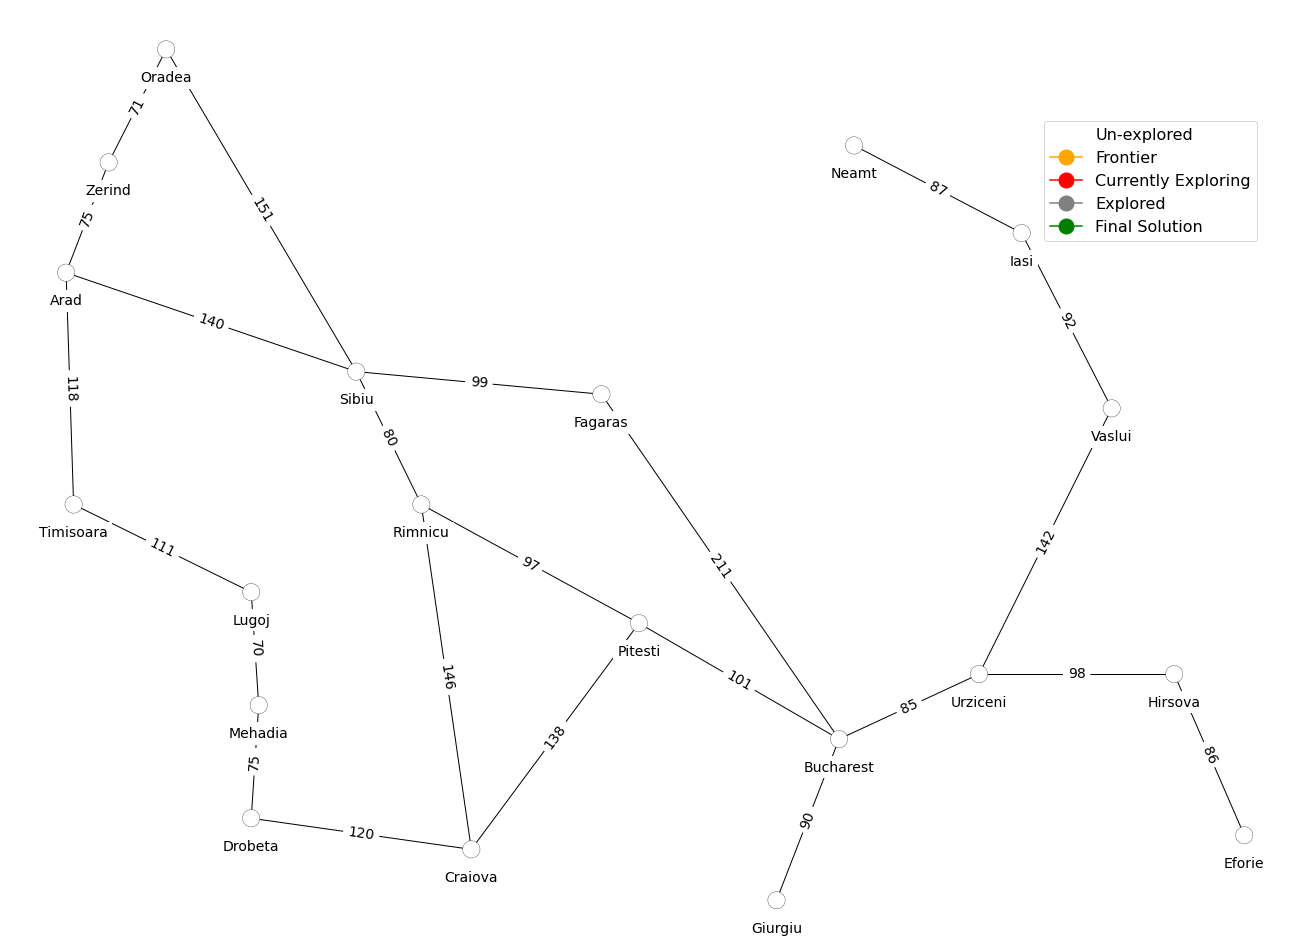

In [8]:
show_map(romania_graph_data)

In [9]:
## el siguiente código crea un diccionario y calcula y añade al diccionario la distancia manhattan entre las ciudades. 
import numpy as np

distances = {}
all_cities = []

for city in romania_map.locations.keys():
    distances[city] = {}
    all_cities.append(city)
    
all_cities.sort()
print(all_cities)

for name_1, coordinates_1 in romania_map.locations.items():
        for name_2, coordinates_2 in romania_map.locations.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']


In [10]:
# Creamos una instancia del problema TSP con la lista de ciudades anterior que se na extraido del mapa.
# En el mapa hay informacion de las distancias que se utilizan en la clase TSP_problem para calcular el coste y las heurísticas.
tsp = TSP_problem(all_cities)

In [11]:
## Redefinimos el hill climbing de AIMA para que el método de generacion de vecinos sea acceder al grafo que hemos definido para el TSP

def hill_climbing(problem):
    
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    
    def find_neighbors(state, number_of_neighbors=100):
        """ finds neighbors using two_opt method """
        
        neighbors = []
        
        for i in range(number_of_neighbors):
            new_state = problem.two_opt(state)
            neighbors.append(Node(new_state))
            state = new_state
            
        return neighbors

    # as this is a stochastic algorithm, we will set a cap on the number of iterations
    iterations = 10000
    
    current = Node(problem.initial)
    while iterations:
        neighbors = find_neighbors(current.state)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            current.state = neighbor.state
        iterations -= 1
        
    return current.state

In [12]:
# Y lo resolvemos con escalada. 
hill_climbing(tsp)

['Zerind',
 'Eforie',
 'Drobeta',
 'Lugoj',
 'Iasi',
 'Vaslui',
 'Giurgiu',
 'Bucharest',
 'Pitesti',
 'Timisoara',
 'Rimnicu',
 'Oradea',
 'Fagaras',
 'Neamt',
 'Sibiu',
 'Craiova',
 'Urziceni',
 'Arad',
 'Mehadia',
 'Hirsova']

In [13]:
hill_climbing(tsp)

['Iasi',
 'Arad',
 'Bucharest',
 'Eforie',
 'Pitesti',
 'Drobeta',
 'Sibiu',
 'Lugoj',
 'Timisoara',
 'Giurgiu',
 'Zerind',
 'Mehadia',
 'Urziceni',
 'Fagaras',
 'Rimnicu',
 'Vaslui',
 'Oradea',
 'Craiova',
 'Hirsova',
 'Neamt']

### Ejercicio 1. Resuelve el problema TSP con el algoritmo de escalada por máxima pendiente en el mapa de ciudades de Rumanía y explica el resultado obtenido. 

Realiza un análisis razonado de las propiedades del algoritmo: eficiencia y optimalidad en base a la ejecución.

Este algoritmo no es óptimo, debido a que hacemos uso de una aleatoriedad y en cada estado nos quedamos siempre con el mejor, aunque eso suponga encontrar un camino no óptimo, ya que muchas veces es necesario empeorar para llegar a la solución óptima. La eficiencia en algunos casos será mejor que en otros debido a dicha aleatoriedad. El funcionamiento general de este algoritmo consiste en generar nodos vecinos en cada estado y quedarme con el que contenga la menor distancia. Para generar estos nodos vecinos, calculo dos índices aleatorios e invierto los elementos de la lista que se encuentran entre dichos índices. El algoritmo en general realiza 10000 iteraciones y son limitadas porque nunca sabremos si ya hemos llegado a la solución óptima. Por lo tanto si tengo una solución y llego a otra mejor, la cambio. En cuanto a la eficiencia, si bien es cierto que es más eficiente que otros algoritmos de búsqueda ciega y/o exahustiva debido a que hacemos uso de heurísticas y no generamos todos los estados posibles para resolver nuestro problema, llegamos a una solución de una forma relativamente rápida pero no óptima.

¿Ha encontrado el algoritmo el óptimo global? 
¿Ha encontrado la misma solución en distintas ejecuciones?

El algoritmo no encuentra el óptimo global debido a la naturaleza aleatoria del algoritmo y a que no evaluamos todas las combinaciones posibles. En cada ejecución obtenemos una solución distinta por las mismas razones, aunque siempre será la optima dentro de las opciones posibles.

Sólo se pide hacer una comparativa teórica (breve) con cómo se comporta este algoritmo y relacionarlo con otros algoritmos vistos en clase.

Después de describir en el primer apartado como funciona el algoritmo, la principal diferencia respecto a los vistos en clase, es que cuando llegamos a un estado, generamos vecinos aleatorios para ver si encontramos una solución mejor. En los algoritmos de búsqueda ciega, únicamente vamos generando hijos hasta que encontramos una solución válida. En los algoritmos heurísticos hacemos lo mismo, pero eligiendo los hijos más prometedores.

Opcionalmente se puede hacer la comparativa real con algún algoritmo de búsqueda exhaustiva. 


## Parte 2. Enfriamiento simulado ( simulated annealing) 
El algoritmo de enfriamiento simulado puede manejar las situaciones de óptimo local o mesetas típicas en algoritmos de escalada.
<br>
El enfriamiento simulado es bastante similar a la escalada pero en lugar de elegir el mejor movimiento en cada iteración, elige un movimiento aleatorio. Si este movimiento aleatorio nos acerca al óptimo global, será aceptado,
pero si no lo hace, el algoritmo puede aceptar o rechazar el movimiento en función de una probabilidad dictada por la temperatura.  Cuando la `temperatura` es alta, es más probable que el algoritmo acepte un movimiento aleatorio incluso si es malo. A bajas temperaturas, solo se aceptan buenos movimientos, con alguna excepción ocasional.
Esto permite la exploración del espacio de estado y evita que el algoritmo se atasque en el óptimo local.

    Usaremos la implementación de AIMA del modulo search.py
    
    def simulated_annealing(problem, schedule=exp_schedule()):
    """[Figure 4.5] CAUTION: This differs from the pseudocode as it
    returns a state instead of a Node."""
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current.state
        neighbors = current.expand(problem)
        if not neighbors:
            return current.state
        next_choice = random.choice(neighbors)
        delta_e = problem.value(next_choice.state) - problem.value(current.state)
        if delta_e > 0 or probability(math.exp(delta_e / T)):
            current = next_choice

Como hemos visto en clase hay varios métodos de enfriamiento (scheduling routine) 
Se puede variar el método de enfriamiento. En la implementación actual estamos usando el método de enfriamiento exponencial (que se pasa como parámetro). 

    def exp_schedule(k=20, lam=0.005, limit=100):
        """One possible schedule function for simulated annealing"""
        return lambda t: (k * math.exp(-lam * t) if t < limit else 0)

Como ejemplo, vamos a definir un problema sencillo de encontrar el punto más alto en una rejilla. Este problema está definido en el módulo search.py como PeakFindingProblem. Lo reproducimos aquí y creamos una rejilla simple.

In [14]:
initial = (0, 0)
grid = [[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 1]]

In [15]:
# Pre-defined actions for PeakFindingProblem
directions4 = { 'W':(-1, 0), 'N':(0, 1), 'E':(1, 0), 'S':(0, -1) }
directions8 = dict(directions4) 
directions8.update({'NW':(-1, 1), 'NE':(1, 1), 'SE':(1, -1), 'SW':(-1, -1) })

class PeakFindingProblem(Problem):
    """Problem of finding the highest peak in a limited grid"""

    def __init__(self, initial, grid, defined_actions=directions4):
        """The grid is a 2 dimensional array/list whose state is specified by tuple of indices"""
        Problem.__init__(self, initial)
        self.grid = grid
        self.defined_actions = defined_actions
        self.n = len(grid)
        assert self.n > 0
        self.m = len(grid[0])
        assert self.m > 0

    def actions(self, state):
        """Returns the list of actions which are allowed to be taken from the given state"""
        allowed_actions = []
        for action in self.defined_actions:
            next_state = vector_add(state, self.defined_actions[action])
            if next_state[0] >= 0 and next_state[1] >= 0 and next_state[0] <= self.n - 1 and next_state[1] <= self.m - 1:
                allowed_actions.append(action)

        return allowed_actions

    def result(self, state, action):
        """Moves in the direction specified by action"""
        return vector_add(state, self.defined_actions[action])

    def value(self, state):
        """Value of a state is the value it is the index to"""
        x, y = state
        assert 0 <= x < self.n
        assert 0 <= y < self.m
        return self.grid[x][y]


In [16]:
problem = PeakFindingProblem(initial, grid, directions4)

In [17]:
# Lo resolvemos con enfriamiento simulado

solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
max(solutions)

9

In [18]:
def hill_climbing(problem):
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            break
        current = neighbor
    return current.state

In [19]:
solution = problem.value(hill_climbing(problem))
solution

7

### Ejercicio 2.  Resuelve el problema anterior de encontrar el punto máximo en una rejilla. Comenta y razona los resultados obtenidos en distintas rejjillas con los algoritmos de enfriamiento simulado y escalada por máxima pendiente. 
 
 
Ejemplo de rejilla para pruebas

grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]
        
        
Con este ejemplo de grid:

- El resultado para enfriamiento simulado es 11.2, mientras que para hill climbing es 0.0

- En el caso del enfriamiento simulado, obtenemos el punto más alto en la rejilla que es el 11.2 mientras que en el hill climbing nos encontramos con 0.0 que en este caso es el punto más bajo.

- La solución que encontramos con hill climbing, se debe a que el valor inicial en la rejilla es 0.0 y al compararlo con su vecino más próximo, ambos tienen el mismo valor y no busca más en la rejilla un punto más alto.

- Con enfriamiento simulado, sin embargo, sí que encontramos el punto más alto de la rejilla ya que vamos comparando el valor actual de la rejilla con el valor de un vecino aleatorio y con una temperatura baja la probabilidad de aceptar un mal vecino es muy baja. Si el vecino es un punto más alto, el nodo actual será el punto más alto, por lo que al encontrar el valor mayor que es 11.2 no ha encontrado ningún vecino en la rejilla que tuviera un valor mayor y la temperatura era muy baja.


Con el primer ejemplo de grid:

- El resultado para enfriamiento simulado es 9, mientras que para hill climbing es 7

- Como en el ejemplo anterior, con enfriamiento simulado encontramos el punto más alto de la rejilla de la misma forma.

- En este caso, el resultado de hill climbing es diferente ya que, el primer valor de la rejilla es 3 y su vecino es 7 siendo este un punto más alto, entonces el valor que nos quedamos por el momento es 7, pero como el valor siguiente es 2 que es menor a 7, entonces el bucle se rompe y no buscamos un punto más alto en la rejilla.


## Parte 3. Algoritmos genéticos


Se define una clase ProblemaGenetico que incluye los elementos necesarios para la representación de un problema de optimización que se va a resolver con un algoritmo genético. Los elementos son los que hemos visto en clase:

 - genes: lista de genes usados en el genotipo de los estados.
 - longitud_individuos: longitud de los cromosomas
 - decodifica: función de obtiene el fenotipo a partir del genotipo.
 - fitness: función de valoración.
 - muta: función de mutación de un cromosoma 
 - cruza: función de cruce de un par de cromosomas

In [1]:
import random

In [2]:
class ProblemaGenetico(object):
        def __init__(self, genes,fun_dec,fun_muta , fun_cruza, fun_fitness,longitud_individuos):
            self.genes = genes
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.longitud_individuos = longitud_individuos
            """Constructor de la clase"""
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

En primer lugar vamos a definir una instancia de la clase anterior correspondiente al problema de optimizar (maximizar o minimizar) la función cuadrado x^2 en el conjunto de los números naturales menores que 2^{10}.
Se usa este ejemplo (del que sabemos la solución) para ver todos los elementos y poder observar el comportamiento. 


In [3]:
# Será necesaria la siguiente función que interpreta una lista de 0's y 1's como un número natural:  
# La siguiente función que interpreta una lista de 0's y 1's como
# un número natural:  

def binario_a_decimal(x):
    return sum(b*(2**i) for (i,b) in enumerate(x)) 

In [23]:
list(enumerate([1, 0, 0]))

[(0, 1), (1, 0), (2, 0)]

In [4]:
# En primer luegar usaremos la clase anterior para representar el problema de optimizar (maximizar o minimizar)
# la función cuadrado en el conjunto de los números naturales menores que
# 2^{10}.

# Tenemos que definir funciones de cruce, mutación y fitness para este problema.

def fun_cruzar(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad"""
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    return [cruce1,cruce2]

def fun_mutar(cromosoma,prob):
    """Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob"""
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):
        cromosoma[p] =  (cromosoma[p]+1)%2
    return cromosoma

def fun_fitness_cuad(cromosoma):
    """Función de valoración que eleva al cuadrado el número recibido en binario"""
    n = binario_a_decimal(cromosoma)**2
    return n

cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,10)

Una vez definida la instancia cuadrados que representa el problema genético, probar alguna de las funciones definidas en la clase anterior, para esta instancia concreta. Por ejemplo:

In [25]:
cuadrados.decodifica([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1329

1329

In [26]:
cuadrados.fitness([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1766241

1766241

In [27]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [28]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]

In [29]:
cuadrados.cruza([1,0,0,0,1,1,0,0,1,0,1],[0,1,1,0,1,0,0,1,1,1])
# Posible salida: [[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]l 

[[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

### Ejercicio 3

   - Definir una función poblacion_inicial(problema_genetico,tamaño), para definir una población inicial de un tamaño dado, para una instancia dada de la clase anterior ProblemaGenetico

sugerencia: usar random.choice

   - Definir una función de cruce que recibe una instancia de Problema_Genetico y una población de padres (supondremos que hay un número par de padres), obtiene la población resultante de cruzarlos de dos en dos (en el orden en que aparecen)

cruza_padres(problema_genetico,padres)

   - Definir la función de mutación que recibe una instancia de Problema_Genetico, una población y una probabilidad de mutación, obtiene la población resultante de aplicar operaciones de mutación a cada individuo llamando a la función muta definida para el problema genético.
muta_individuos(problema_genetico, poblacion, prob)

In [5]:
def poblacion_inicial(problema_genetico, size):
    l = []
    for i in range(size):
        aux = []
        for j in range(problema_genetico.longitud_individuos):
            aux.append(random.choice(problema_genetico.genes))
        l.append(aux)
            
    return l

In [31]:
poblacion_inicial(cuadrados,10)

[[1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 1, 0, 1, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
 [0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 0, 1],
 [0, 1, 1, 0, 0, 0, 1, 0, 0, 1]]

In [6]:
def cruza_padres(problema_genetico,padres):
    l = []
    i = 0
    while(i < len(padres)):
        cruces = problema_genetico.cruza(padres[i], padres[i + 1])
        i += 2
        l.append(cruces[0])
        l.append(cruces[1])
    return l

In [33]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

cruza_padres(cuadrados,p1)
# Posible salida
# [[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
#  [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
#  [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
#  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

[[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]]

In [7]:
def muta_individuos(problema_genetico, poblacion, prob):
    
    l =[]
    
    # hay que llamar a  problema_genetico.muta(x,prob) para todos los individuos de la poblacion.
    for i in range(len(poblacion)):
        l.append(problema_genetico.muta(poblacion[i], prob))
    
    return l    

In [35]:
muta_individuos(cuadrados,p1,0.5)
# Posible salida:
#  [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#   [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
#   [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
#   [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#   [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 0, 0, 1, 1],
 [0, 1, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [36]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [37]:
muta_individuos(cuadrados,p1,0.5)

[[1, 1, 0, 1, 1, 1, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

### Ejercicio 4

Se pide definir una función de selección mediante torneo de n individuos de una población.  
La función recibe como entrada:
 - una instancia de la clase ProblemaGenetico
 - una población
 - el número n de individuos que vamos a seleccionar
 - el número k de participantes en el torneo
 - un valor opt que puede ser o la función max o la función min (dependiendo de si el problema es de maximización o de minimización, resp.).

seleccion\_por\_torneo(problema_genetico,poblacion,n,k,opt) 

INDICACIÓN: Usar random.sample para seleccionar k elementos de una secuencia. 
Por ejemplo, random.sample(population=[2,5,7,8,9], k=3) devuelve [7,5,8]. 

In [8]:
def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados  

In [39]:
#Ejemplo
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,max)
# Posible salida: [[1, 1, 1, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]]


[[1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 1, 1, 1]]

In [40]:
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,min)
# [[0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]]

[[0, 1, 1, 0, 0, 1, 1, 0, 1, 0],
 [0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 1, 1, 0, 0, 0]]

In [9]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no hemos llegado al número de generaciones fijado:  t < nGen
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    Evalua la población P(t+1) 
#    t:= t+1
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 


Necesitarás definir la función auxiliar nueva_generacion(problema_genetico,poblacion,n_padres,n_directos,prob_mutar) que dada una población calcula la siguiente generación.

In [10]:
#Definir la función nueva_generacion
def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

### Ejercicio 5.  Ejecutar el algoritmo genético anterior, para resolver el problema anterior (tanto en minimización como en maximización).  

Hacer una valoración de resultados y comentarios sobre el comportamiento del algoritmmo. 
En la resolución del problema hay que tener en cuenta que el algoritmo genético devuelve un par con el mejor fenotipo encontrado y su valoración.

In [43]:
algoritmo_genetico(cuadrados,3,min,20,10,0.7,0.1)
# Salida esperada: (0, 0)

(0, 0)

In [44]:
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)
# Salida esperada: (1023, 1046529)

(1015, 1030225)

Cuando resolvemos el problema en minimización:
Tras varias ejecuciones, el resultado que más hemos obtenido ha sido la solución óptima. Aunque el resto de resultados han dado fenotipos con valores bajos dentro del rango posible.

Cuando resolvemos el problema en maximización:
El resultado tras varias ejecuciones que más hemos conseguido ha sido la salida esperada, el resto de resultados como con la operación minimización han sido fenotipos con valores altos cercanos al máximo del rango.

El algoritmo genético mientras no se haya llegado al número de generaciones deseadas, crea poblaciones con las que se calcula la siguiente generación mediante una función auxiliar. En la función auxiliar cruzamos los genes de los padres y mutamos o no individuos en función de la probabilidad, con la generación de los padres y sus cruces, siendo el resultado de la posible mutación lo que devuelve la función auxiliar.
Una vez se llega al número de generaciones marcada se maximiza o minimiza la población generada, se decodifica el resultado obtenido y se devuelve, dando lugar a devolver el mejor resultado obtenido que no tiene por que ser el óptimo.

Esto provoca que no siempre obtengamos el resultado deseado y que no sea un algoritmo realmente óptimo.

##  El problema de la mochila 

Se plantea el típico problema de la mochila en el que dados n objetos de pesos conocidos pi y valor vi (i=1,...,n) hay que elegir cuáles se meten en una mochila que soporta un peso P máximo. La selección debe hacerse de forma que se máximice el valor de los objetos introducidos sin superar el peso máximo.

### Ejercicio 6
Se pide definir la representación del problema de la mochila usando genes [0,1] y longitud de los individuos n.

Los valores 1 ó 0 representan, respectivamente, si el objeto se introduce o no en la mochila Tomados de izquerda a derecha, a partir del primero que no cabe, se consideran  todos fuera de la mochila,independientemente del gen en su posición. De esta manera, todos los individuos representan candidatos válidos.

El numero de objetos n determina la longitud de los individuos de la población.
En primer lugar es necesario definir una función de decodificación de la mochila que recibe como entrada:
* un cromosoma (en este caso, una lista de 0s y 1s, de longitud igual a n_objetos) 
* n: número total de objetos de la mochila
* pesos: una lista con los pesos de los objetos
* capacidad: peso máximo de la mochila.
La función decodifica recibe (cromosoma, n, pesos, capacidad) y devuelve una lista de 0s y 1s que indique qué objetos están en la mochila y cuáles no (el objeto i está en la mochila si y sólo si en la posición i-ésima de la lista hay un 1). Esta lista se obtendrá a partir del cromosoma, pero teniendo en cuenta que a partir del primer objeto que no quepa, éste y los siguientes se consideran fuera de la mochila, independientemente del valor que haya en su correspondiente posición de cromosoma. 

In [45]:
def decodifica_mochila(cromosoma, n, pesos, capacidad):
    peso_en_mochila = 0
    l = []
    
    #Recorro los objetos totales
    for i in range(n):
        
        #Si está en la mochila y al añadirlo no supero la capacidad, lo añado
        if cromosoma[i] == 1 and peso_en_mochila + pesos[i] <= capacidad:
            l.append(1)
            peso_en_mochila += pesos[i]
        #En otro caso no lo añado
        elif cromosoma[i]== 0 or peso_en_mochila + pesos[i] > capacidad:
            l.append(0)
            
    return l 

In [46]:
decodifica_mochila([1,1,1,1,1], 5, [2,3,4,5,1], 5)

[1, 1, 0, 0, 0]

Para definir la función de evaluación (fitness) necesitamos calcular el valor total de los objetos que están dentro de la mochila que representa el cromosoma según la codificación utilizada en la función anterior. 

Se pide la función fitness (cromosoma, n_objetos, pesos, capacidad, valores) donde los parámetros son los mismos que en la función anterior, y valores es la lista de los valores de cada objeto

fitness(cromosoma, n_objetos, pesos, capacidad, valores)

Ejemplo de uso:
   fitness([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])
   7

In [47]:
def fitness_mochila(cromosoma, n_objetos, pesos, capacidad, valores):
    
    valor = 0
    peso_en_mochila = 0
    
    #Recorro los objetos
    for i in range(n_objetos):    
        
        #Si están en la mochila y no superan el peso, sumo su valor al total
        if cromosoma[i] == 1 and peso_en_mochila + pesos[i] <= capacidad:
            valor += valores[i]
            peso_en_mochila += pesos[i]

    return valor

In [48]:
fitness_mochila([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])

7

Damos tres instancias concretas del problema de la mochila. Damos también sus soluciones optimas, para que se puedan comparar con los resultados obtenidos por el algoritmo genético:

In [49]:
# Problema de la mochila 1:
# 10 objetos, peso máximo 165
pesos1 = [23,31,29,44,53,38,63,85,89,82]
valores1 = [92,57,49,68,60,43,67,84,87,72]

# Solución óptima= [1,1,1,1,0,1,0,0,0,0], con valor 309

In [50]:
# Problema de la mochila 2:
# 15 objetos, peso máximo 750

pesos2 = [70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
valores2 = [135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]

# Solución óptima= [1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] con valor 1458

In [51]:
# Problema de la mochila 3:
# 24 objetos, peso máximo 6404180
pesos3 = [382745,799601,909247,729069,467902, 44328,
       34610,698150,823460,903959,853665,551830,610856,
       670702,488960,951111,323046,446298,931161, 31385,496951,264724,224916,169684]
valores3 = [825594,1677009,1676628,1523970, 943972,  97426,
       69666,1296457,1679693,1902996,
       1844992,1049289,1252836,1319836, 953277,2067538, 675367,
       853655,1826027, 65731, 901489, 577243, 466257, 369261]

# Solución óptima= [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1] con valoración 13549094

### Ejercicio 7

Definir variables m1g, m2g y m3g, referenciando a instancias de Problema_Genetico que correspondan, respectivamente, a los problemas de la mochila anteriores. Resuelve los problemas y comentar los resultados obtenidos en cuanto a eficiencia y calidad de los resultados obtenidos.

Algunas de las salidas posibles variando los parámetros.

In [52]:
# >>> algoritmo_genetico_t(m1g,3,max,100,50,0.8,0.05)
# ([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

# >>> algoritmo_genetico_t(m2g,3,max,100,50,0.8,0.05)
# ([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], 1444)
# >>> algoritmo_genetico_t(m2g,3,max,200,100,0.8,0.05)
# ([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], 1439)
# >>> algoritmo_genetico_t(m2g,3,max,200,100,0.8,0.05)
# ([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], 1458)

# >>> algoritmo_genetico_t(m3g,5,max,400,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 13518963)
# >>> algoritmo_genetico_t(m3g,4,max,600,200,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 13524340)
# >>> algoritmo_genetico_t(m3g,4,max,1000,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13449995)
# >>> algoritmo_genetico_t(m3g,3,max,1000,100,0.75,0.1)
# ([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13412953)
# >>> algoritmo_genetico_t(m3g,3,max,2000,100,0.75,0.1)
# ([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 13366296)
# >>> algoritmo_genetico_t(m3g,6,max,2000,100,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 13549094)

In [53]:
def fitness_mochila_1(cromosoma):
    v = fitness_mochila(cromosoma, 10, pesos1, 165, valores1)
    return v
def decodifica_mochila_1(cromosoma):
    v = decodifica_mochila(cromosoma, 10, pesos1, 165)
    return v
m1g = ProblemaGenetico([0,1], decodifica_mochila_1, fun_mutar, fun_cruzar, fitness_mochila_1,10)

def fitness_mochila_2(cromosoma):
    v = fitness_mochila(cromosoma, 15, pesos2, 750, valores2)
    return v
def decodifica_mochila_2(cromosoma):
    v = decodifica_mochila(cromosoma, 14, pesos2, 750)
    return v
m2g = ProblemaGenetico([0,1], decodifica_mochila_2, fun_mutar, fun_cruzar, fitness_mochila_2,15)

def fitness_mochila_3(cromosoma):
    v = fitness_mochila(cromosoma, 24, pesos3,6404180 , valores3)
    return v
def decodifica_mochila_3(cromosoma):
    v = decodifica_mochila(cromosoma, 24, pesos3, 6404180)
    return v
m3g = ProblemaGenetico([0,1], decodifica_mochila_3, fun_mutar, fun_cruzar, fitness_mochila_3,24)


In [54]:
algoritmo_genetico(m1g,3,max,100,50,0.8,0.05)
# Solución óptima= [1,1,1,1,0,1,0,0,0,0], con valor 309

([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

In [55]:
algoritmo_genetico(m1g,3,max,300,70,0.8,0.05)

([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

Para el caso de m1g, no hace falta un número alto de generaciones ni de individuos por cada una, ya que con unos valores bajos de estos ya obtenemos el valor óptimo, obteniendólo también con valores más altos de generaciones e individuos.


In [56]:
algoritmo_genetico(m2g,3,max,200,100,0.8,0.05)
# Solución óptima= [1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] con valor 1458

([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0], 1446)

In [57]:
algoritmo_genetico(m2g,4,max,200,100,0.8,0.05)

([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1], 1449)

Para el caso m2g vemos cómo para un número bajo de generaciones e individuos por generación, la solución obtenida no es la óptima y está alejada del resultado deseado, mientras que aumentando las generaciones, individuos por generación y el número de participantes, aunque las soluciones resultantes han sido variadas, obtenemos un resultado más acercado a la solución óptima. Al aumentar los parámetros, la probabilidad de generar hijos con peores genes aumenta a la par que la probabilidad de obtener la solución óptima.


In [58]:
algoritmo_genetico(m3g,5,max,400,200,0.75,0.1)
# Solución óptima= [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1] con valoración 13549094

([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
 13524340)

In [59]:
algoritmo_genetico(m3g,6,max,2000,100,0.75,0.1)

([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1],
 13456720)

Para m3g, vemos que no hemos encontrado la solución óptima, a pesar de ser random las mutaciones de los hijos generados en cada generación. Como con el problema anterior, la probabilidad de obtener un mejor resultado aumenta al aumentar los parámetros, a la vez que obtenemos muchos resultados adversos.


En conclusión, la eficiencia del algoritmo depende del número de valores con los que vayas a operar, ya que a mayor número de valores, mayores serán los cruces realizados por lo que la obtención de la solucíon óptima será más difícil y, el aumentar las generaciones y los individuos por generación no te garantiza el obtener la solución. Aunque ni teniendo un número bajo de valores con los que operar el algoritmo es plenamente eficiente y óptimo.

### Ejercicio 8
Resolver mediante una configuración de un algoritmo genético el problema del cuadrado mágico que consiste en colocar en un cuadrado n × n los números naturales de 1 a n^2, 
de tal manera que las filas, las columnas y las diagonales principales sumen los mismo. 
Ejemplo: una solucion para n= 3
    
    4 3 8
    9 5 1
    2 7 6
    
- Dimension del cuadrado: N
- Suma común: SUMA=(N·(N^2 + 1))/2
    
    Comenta el resultado y el rendimiento del algoritmo para distintos parámetros.
    

    
    

Para este problema, hemos elegido una representación de los genes que va desde 1 a n^2. Hemos considerado que era mejor opción puesto que por ejemplo, para n = 3, necesitamos 4 bits para representar cada valor, y al tratar con los cromosomas podríamos entrar en individuos cuyo valor binario fuesen valores en decimal que se saliesen de rango 1-9. Por otra parte, para representar el cuadrado hemos utilizado una lista de n^2 elementos.
También hemos optado por hacer control de repetidos en las funciones de cruce y mutación, evitando modificar la función fitness. Debido a esto, nos hemos visto en la obligación de modificar también la función poblacion_inicial, ya que en la original no haciamos control de repetidos, y nos parecía absurdo generar individuos que tuviesen valores repetidos en la población inicial. Asimismo, como esta función era llamada por la función algoritmo_genético, también hemos hecho una específica.

#### Población inicial

Puesto que en la lista de genes tenemos todos los números que tengo que colocar en el cuadrado, llamo a la random.simple para coger todos los valores de la lista de genes sin repetición. Así genero size individuos aleatorios sin genes repetidos.

In [60]:
def poblacion_inicial_cuadrado(problema_genetico, size):
    l = []
    for i in range(size):
        aux = (random.sample(problema_genetico.genes, problema_genetico.longitud_individuos))
        l.append(aux)
            
    return l

#### Algoritmo genético

Únicamente cambia la primera llamada a población inicial

In [61]:
def algoritmo_genetico_cuadrado(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial_cuadrado(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 

#### Inicializa genes

Función que, dado una n, inicializa la lista de genes posibles. Por ejemplo, si n = 3, los valores posibles de los genes serán una lista de 1 a 9.

In [15]:
def inicializa_genes(n):
    l = []
    for i in range(n*n):
        l.append(i + 1)
    
    return l

#### Decodificar cuadrado mágico

Como nuestra representación del cromosoma es igual que la representación real, devuelve el mismo cromosoma.

In [63]:
def decodifica_cuad_magico(cromosoma):
    return cromosoma

#### Cruzar cuadrado mágico

Nuestra función de cruce es muy parecida  a la de los anteriores. Hemos optado por seguir manteniendo el cruce de 1 punto pero haciendo un control de repetidos. Para ello tenemos dos listas, una con un array booleano para saber que valores han aparecido ya, y otra con los valores en sí. Realizamos el cruce y despues lo recorremos para marcar los números que han aparecido 2 veces y a la vez quitamos los valores que aparecen la primera vez de la lista. Después cambiamos los valores repetidos por aquellos que no se han eliminado. Como hacemos este control, es imposible que un valor aparezca más de 2 veces en un cruce.

Después de explicar en clase las estrategias, hemos decidido ampliar la función y optar por una estrategia no destructiva. Para ello, añadimos a una lista de pares clave-valor los padres y los hijos junto a su función fitness. Los ordenamos en función de esta última y nos quedamos con los dos mejores.

In [64]:
from operator import itemgetter

def cruzar_cuad_magico (cromosoma1, cromosoma2, n):
    
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    
    #Listas auxiliares
    elementos = []
    marcas = []
    
    #Inicialización auxiliar
    for i in range(l1):
        elementos.append(i + 1)
        marcas.append(False)
    
    #Primer hijo
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    
    #Marco los genes repetidos
    for i in range(l1):
        if cruce1[i] in elementos:
            elementos.remove(cruce1[i])
        else:
            marcas[i] = True
    
    j = 0
    
    #Elimino los genes repetidos
    for i in range(l1):
        if (marcas[i] == True):
            cruce1[i] = elementos[j]
            j += 1
            
    #Segundo hijo
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    
    #Inicialización auxiliar
    for i in range(l2):
        elementos.append(i + 1)
        marcas.append(False)
        
    #Marco los genes repetidos
    for i in range(l2):
        if cruce2[i] in elementos:
            elementos.remove(cruce2[i])
        else:
            marcas[i] = True
    
    j = 0
    
    #Elimino los genes repetidos
    for i in range(l2):
        if (marcas[i] == True):
            cruce2[i] = elementos[j]
            j += 1
    
    #Array con todos los individuos
    padres_hijos = []
    
    #Los añado como pares clave-valor
    padres_hijos.append((cromosoma1, fitness_cuad_magico(cromosoma1, n)))
    padres_hijos.append((cromosoma2, fitness_cuad_magico(cromosoma2, n)))
    padres_hijos.append((cruce1, fitness_cuad_magico(cruce1, n)))                   
    padres_hijos.append((cruce2, fitness_cuad_magico(cruce2, n)))
    
    #Ordeno en función del fitness
    padres_hijos = sorted(padres_hijos, key=itemgetter(1))
    
    #Devuelvo los que tienen fitness mayor
    return [padres_hijos[2][0], padres_hijos[3][0]]

#### Mutar cuadrado mágico

Esta función simplemente realiza una permutación de dos valores. Genero un gen aleatorio entre 1 y n^2, lo localizo y lo intercambio por el que ocupaba dicha posición.

In [65]:
def mutar_cuad_magico(cromosoma, prob, n):
    
    #Elijo un elemento al azar del cromosoma
    l = len(cromosoma)
    p = random.randint(0,l-1)
    
    if prob > random.uniform(0,1):
        
        #Calculo un gen aleatorio que guardaré en la posición
        random_number = random.randint(1, n*n)
        aux = cromosoma[p]
        
        #Busco la posición de ese número
        for i in range(len(cromosoma)):
            if (cromosoma[i] == random_number):
                cromosoma[i] = aux
        
        cromosoma[p] = random_number
    
    return cromosoma

#### Fitness cuadrado mágico

En un primer momento se nos ocurrió calcular las diferencias de cada fila/columna/diagonal respecto a la suma y minimizar el fitness. En una segunda versión, nuestra función fitness devuelve el número de sumas que son correctas (si n = 3, fitness a lo sumo devolverá 8). Para ello hacemos un primer recorrido calculando sumas de filas y columnas a la vez y un segundo para las diagonales. 

In [71]:
def fitness_cuad_magico(cromosoma, n):
    
    #Valor de la suma
    suma = (n*(n*n + 1))/2
    
    #Valor de retorno
    total = 0
    
    #Recorrido de la lista de n^2 elementos
    for i in range(n):
        suma_filas = 0
        suma_columnas = 0
        
        #Sumo el total de la fila/columna
        for j in range(n):
            
            #Si n=3 e i=0, sumo las posiciones 0, 1 y 2 
            suma_filas += cromosoma[n*i + j]
            #Si n=3 e i=0, sumo las posiciones 0, 3 y 6 
            suma_columnas += cromosoma[i + n*j]
        
        if(suma_filas == suma):
            total += 1
        
        if(suma_columnas == suma):
            total += 1
    
    #Variables donde guardo las sumas de las diagonales
    suma_diagonal_1 = 0
    suma_diagonal_2 = 0
    
    #Recorrido de las diagonales 
    for i in range(n):
        
        #Si n=3, sumo las posiciones 0, 4 y 8
        suma_diagonal_1 += cromosoma[(n+1)*i]
        #Si n=3, sumo las posiciones 2, 4 y 6
        suma_diagonal_2 += cromosoma[(n-1) + (n-1)*i]
        
    if(suma_diagonal_1 == suma):
        total += 1
    if(suma_diagonal_2 == suma):
        total += 1

    return total

#### Funciones adicionales necesarias para la generalización del problema

Hemos redefinido las funciones para que nuestro problema funcione para cualquier n, sin embargo, es necesario pasarle algún valor extra por parámetro.

In [72]:
def cruzar_cuad_magico_3 (cromosoma1, cromosoma2):
    return cruzar_cuad_magico (cromosoma1, cromosoma2, 3)

def mutar_cuad_magico_3(cromosoma, prob):
    return mutar_cuad_magico(cromosoma, prob, 3)

def fitness_cuad_magico_3(cromosoma):
    return fitness_cuad_magico(cromosoma, 3)

Ejemplo de la función fitness para la solución de ejemplo.

In [73]:
fitness_cuad_magico([4, 3, 8, 9, 5, 1, 2, 7, 6], 3)

8

Inicialización del problema genético para n = 3

In [74]:
cm3 = ProblemaGenetico(inicializa_genes(3),decodifica_cuad_magico, mutar_cuad_magico_3, cruzar_cuad_magico_3, fitness_cuad_magico_3, 9)

#### Ejemplos de ejecuciones

In [96]:
algoritmo_genetico(cm3,3,max,100,100,0.5,0.1)

([8, 3, 4, 7, 2, 6, 9, 1, 5], 6)

In [97]:
algoritmo_genetico(cm3,3,max,100,100,0.8,0.1)

([4, 9, 2, 3, 5, 7, 8, 1, 6], 8)

In [98]:
algoritmo_genetico(cm3,10,max,100,100,0.8,0.1)

([5, 7, 3, 9, 2, 4, 1, 6, 8], 7)

In [109]:
algoritmo_genetico_cuadrado(cm3,10,max,100,100,0.8,0.05)

([5, 3, 7, 9, 4, 2, 1, 8, 6], 7)

In [110]:
algoritmo_genetico(cm3,10,max,1000,100,0.5,0.1)

([8, 1, 6, 9, 2, 4, 7, 3, 5], 6)

In [111]:
algoritmo_genetico(cm3,10,max,1000,100,0.7,0.1)

([4, 9, 2, 3, 5, 7, 8, 1, 6], 8)

In [112]:
algoritmo_genetico(cm3,5,max,1000,100,0.7,0.1)

([8, 1, 6, 3, 5, 7, 4, 9, 2], 8)

#### Conclusión

Trás varias ejecuciones con diferentes parámetros, al problema le cuesta llegar a una solución óptima, es decir, en la que se cumpla que tanto todas las filas, columnas y diagonales sumen (N·(N^2 + 1))/2. Si aumentamos el número de generaciones o el de individuos por generación, tendremos más posibilidades de llegar a una solución óptima, pero no se puede asegurar debido a la aleatoriedad. También hemos observado que subir el número de participantes en el torneo hace que se seleccionen individuos menos buenos. Por otro lado, el algoritmo funciona mejor cuando la probabilidad de mutación es baja y la proporción de padres es mayor que 0.5. En las ejecuciones de ejemplo, nos han salido soluciones óptimas un mayor número de veces cuando el número de generaciones era superior y el número de participantes era pequeño.

### Ejercicio 9
Se quiere organizar una **jornada de la informática** en la Facultad. 
El Vicedecano necesita organizar el horario y la asignación de profesores para n actividades temáticas, a_1, . . . , a_n.  Dispone de m profesores p_1, . . . , p_m con distintos niveles de cualificación. 
No todos los profesores tienen los conocimientos para encargarse de todas las actividades. 
El mismo profesor pi puede encargarse de distintas actividades (que se le remunerarán convenientemente) pero no podemos asignar al mismo profesor dos actividades que se impartan simultáneamente. 
Cada actividad puede durar un tiempo diferente dependiendo del profesor que la organice. Si un profesor p_i puede realizar la actividad a_j, entonces denotaremos por t_ij el tiempo que pi tardará en realizar la actividad a_j. 
Existen dependencias entre los contenidos de las actividades lo que obliga a incluir algunas restricciones temporales, es decir, algunas actividades hay que realizarlas cuando otras ya hayan terminado. Esto es, tenemos un conjunto de restricciones que indican que ai se debe realizar antes de a_j. Por ejemplo, El taller de iniciación a Scratch se debe realizar antes que el laboratorio de desarrollo de videojuegos con Scratch.   
Se pide dar una solución al problema de decidir, para cada actividad, qué profesor la realizará y en qué momento se debe ofertar la actividad para que, al ﬁnal de la jornada, se puedan realizar todas las actividades con cuidado de cumplir los prerrequisitos (restricciones temporales) y el conjunto de actividades se realice en el menor tiempo posible.

#### Introducción

Este problema lo hemos resuelto utilizando algoritmos genéticos ya que nos ha parecido la mejor opción.

- Datos de entrada del problema: Para este ejercicio tenemos 4 datos de entrada. Una lista con los profesores representados como strings, una lista de actividades representadas como strings, una lista de restricciones cuyos valores son tuplas con un profesor, un taller y un entero que representa el tiempo que tarda en impartir ese profesor dicho taller y por último, otra lista de dependencias cuyos valores son tuplas con dos talleres tal que el segundo depende del primero, es decir, debe haber terminado el primero para poder impartir el segundo. Ejemplos de distintos datos de entrada:

    - Actividades = ["taller1", "taller2", "taller3", "taller4", "taller5", "taller6", "taller7", "taller8", "taller9", "taller10"]
    - Profesores = ["profesor1", "profesor2", "profesor3", "profesor4", "profesor5"]
    - Restricciones = [("profesor1", "taller1", 60), ("profesor1", "taller2", 60), ("profesor2", "taller3", 60), ("profesor2", "taller4", 60), ("profesor3", "taller5", 60), ("profesor3", "taller6", 60), ("profesor4", "taller7", 60), ("profesor4", "taller8", 60), ("profesor5", "taller9", 60), ("profesor5", "taller10", 60)]
    - Dependencias = [("taller2", "taller1), ("taller5", "taller8")]
    
    
- Representación del problema: Como hemos utilizado algoritmos genéticos, hemos representado el cromosoma como un array y cada posición del mismo representa un taller de la lista. Este array lo llenamos con genes de números enteros, que representarán el profesor que imparte dicho taller. Por ejemplo, un cromosoma válido para los ejemplos de entrada anteriores sería: [1,1,2,2,3,3,4,4,5,5], y en este caso el profesor1 está representado por un 1. Podríamos haber utilizado directamente genes con valores de strings, pero para la eficiencia nos pareció más correcto utilizar números enteros. Por lo tanto, mi lista de genes corresponde con los profesores, pero si genero individuos aleatoriamente, estaría entrando en posibles soluciones no válidas en las que un profesor  imparte un taller para el que no está cualificado. Para ello hacemos un control explicado más adelante.


Nuestra representación es bastante sencilla y si que es cierto que a la hora de añadir las dependencias, la función fitness se nos ha complicado bastante, pero con bastante cabeza hemos conseguido sacarla. A continuación se muestran todas las implementaciones de las funciones con una breve explicación al principio, y después, 7 casos de prueba equivalentes a los que nos has proporcionado por el campus.


#### Funciones auxiliares

Funciones necesarias para simplicar y entender mejor el problema, son llamadas por otras funciones para ayudarlas en su cometido.

- Profesores a elegir: Dado un string representando un taller y unas restricciones, devuelve una lista con los profesores (como valores enteros) que pueden impartir dicho taller. Para ello, recorremos las restricciones en busca de las tuplas que contengan dicho taller.

- Profesor a string: Dado un entero, devuelve un string con el profesor.

- Taller a string: Idéntica a la del profesor pero con un taller.

In [358]:
#Devuelve una lisa con los profesores que pueden impartir un taller
def profesores_a_elegir(taller, restricciones):
    
    l = []
    
    for i in range(len(restricciones)):
        
        #Tuplas de la forma (profesor, taller, tiempo)
        if(restricciones[i][1] == taller):
            #Guardo en la lista el número del profesor, eliminando el resto
            l.append(int(restricciones[i][0].replace("profesor", "")))
            
    return l

In [359]:
def profesor_a_string(profesor):
    return "profesor" + str(profesor)

In [360]:
def taller_a_string(taller):
    return "taller" + str(taller)

Ejemplo de ejecución. La entrada consistirá en un número de 1 a n con el número del taller y devolverá una lista de enteros con los profesores que pueden impartirla.

In [361]:
Restricciones_prueba = [("profesor1", "taller1", 60), ("profesor1", "taller2", 60), ("profesor2", "taller1", 60)]
profesores_a_elegir("taller1", Restricciones_prueba)

[1, 2]

In [362]:
profesor_a_string(2)

'profesor2'

In [363]:
taller_a_string(5)

'taller5'

#### Población inicial

Al igual que en el cuadrado mágico, hemos redefinido la función población inicial para evitar que se generen estados no válidos, es decir, aquellos a los que se asignan profesores a talleres que no pueden impartirlos. Para ello, en vez de hacer uso de los genes como tal, hacemos una reducción de los mismos únicamente escogiendo entre aquellos que pueden impartir dicha asignatura. Hemos añadido un parámetro más con las restricciones.

In [364]:
def poblacion_inicial_horario(problema_genetico, size, restricciones):
    
    #Lista donde guardaré size individuos
    l = []
    for i in range(size):
        
        #Lista auxiliar para generar un individuo
        aux = []
        
        #La longitud coincide con el número de talleres
        for j in range(problema_genetico.longitud_individuos):
            
            #j tomará valores de 0 a n-1 talleres
            taller = j + 1
            #Obtengo los genes posibles para ese taller
            profesores = profesores_a_elegir(taller_a_string(taller), restricciones)
            #Elijo uno aleatoriamente
            aux.append(random.choice(profesores))
            
        l.append(aux)
            
    return l

#### Algoritmo genético

Al igual que en el ejercicio anterior, cambio la llamada a la población inicial. También son necesarias las restricciones para dicha llamada. Lo demás funciona igual.

In [365]:
def algoritmo_genetico_horario(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar, restricciones):
    
    #Llamada a población inicial con un parámetro adicional
    poblacion= poblacion_inicial_horario(problema_genetico,size, restricciones)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 

#### Inicializar genes

Dada una lista de profes, devuelvo una lista con enteros de los talleres. Por ejemplo: [1, 2, 3, ... , n]
Simplemente, reemplazo la lista de profesores original por una lista numérica.

In [366]:
def inicializa_genes_horario(lista_profes):
    l = []
    for i in range(len(lista_profes)):
        l.append(int(lista_profes[i].replace("profesor", "")))
        
    return l

#### Decodificar horario

En una primera versión sin dependencias, nuestra función decodificar era realmente sencilla. La idea era que, dado un cromosoma, lo recorro y devuelvo una lista con el profesor asignado a cada taller. es decir, que cada elemento de la lista era un string. Un ejemplo sería: "El profesor1 imparte el taller1". Puesto que no teníamos dependencias, para hallar el horario simplemente habria que escribir las tareas de cada profesor en orden, sumando los tiempos nos devolvía cuando acaba cada profe (suponiendo, eso si, que todos empiezan en el instante 0).

Sin embargo, el hecho de añadir dependencias, aunque la asignación de profesores fuese correcta, el horario no quedaba bien reflejado en la solución. Es por esto que hemos decidido hacer uso de una parte de la función fitness, que hemos "dividido" para este propósito. En este caso hacemos uso de una función fitness_aux cuyo funcionamiento explicaremos más adelante, pero que básicamente, devuelve una lista de mismo tamaño que el cromosoma (es decir, el número de talleres) en el que cada elemento es un entero con el tiempo en minutos en el que termina este taller. Con estos datos y teninendo las resstricciones de las cuales extraemos el tiempo total del taller (mediante otra función auxiliar explicada más adelante), podemos determinar el tiempo de inicio y fin. De tal forma que la salida de la segunda versión quedará de la forma: "El profesor1 imparte el taller1 de 0 a 60".

Parámetros de entrada:

- cromosoma
- restricciones: utilizadas en la función fitness y para hallar el tiempo de cada actividad.
- num_profes: número de profesores utilizado en la función fitness.
- dependencias: utilizada en la función fitness.

In [367]:
def decodificar_horario(cromosoma, restricciones, num_profes, dependencias):
    
    l = []
    
    #Lista que contendrá el tiempo en el que acaban todos los talleres
    tiempos_fin_actividades = fitness_aux(cromosoma, restricciones, num_profes, dependencias)
    
    #Bucle para recorrer el cromosoma
    for i in range(len(cromosoma)):
        
        profesor_string = profesor_a_string(cromosoma[i])
        taller_string = taller_a_string(i + 1)
        
        #Variable en la que guardamos la duración de un taller
        tiempo = tiempo_profesor(profesor_string, taller_string, restricciones)
        
        #Salida por cada taller. El taller es el índice más 1
        l.append("El " + profesor_string + " imparte el " + taller_string
                 + " de " + str(tiempos_fin_actividades[i] - tiempo) + " a " + str(tiempos_fin_actividades[i]))
        
    return l

#### Cruzar horario

Nuestra función de cruce es realmente sencilla debido a nuestra representación del cromosoma. Perfectamente podríamos haber usado la función original del número al cuadrado. Hemos realizado un pequeño añadido que, haciendo uso del fitness, opto por una estrategia no destructiva.

Parámetros de entrada:

- cromosoma1 y cromosoma2: padres a cruzar
- restricciones: utilizado para calcular el fitness
- num_profes: utilizado para calcular el fitness
- dependencias: utlizado para calcular el fitness

In [368]:
from operator import itemgetter

def cruzar_horario(cromosoma1, cromosoma2, restricciones, num_profes, dependencias):

    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    
    #Array con todos los individuos
    padres_hijos = []
    
    #Los añado como pares clave-valor
    padres_hijos.append((cromosoma1, fitness_horario(cromosoma1, restricciones, num_profes, dependencias)))
    padres_hijos.append((cromosoma2, fitness_horario(cromosoma2, restricciones, num_profes, dependencias)))
    padres_hijos.append((cruce1, fitness_horario(cruce1, restricciones, num_profes, dependencias)))                   
    padres_hijos.append((cruce2, fitness_horario(cruce2, restricciones, num_profes, dependencias)))
    
    #Ordeno en función del fitness
    padres_hijos = sorted(padres_hijos, key=itemgetter(1))
    
    #Devuelvo los que tienen fitness mayor
    return [padres_hijos[2][0], padres_hijos[3][0]]

#### Mutar horario

Función para mutar un gen del cromosoma en función de una probabilidad. Se elige un gen de todo el cromosoma al azar y se sustituye por los valores posibles de ese gen. Muy simple.

Parámetros de entrada:

- cromosoma: cromosoma a mutar
- prob: probabilidad de mutación
- restricciones: utilizada para calcular los genes que puedo sustituir

In [369]:
def mutar_horario(cromosoma, prob, restricciones):
    
    #Genero una posición aleatoria del cromosoma
    l = len(cromosoma)
    p = random.randint(0,l-1)
    
    if prob > random.uniform(0,1):
        
        #Taller que he seleccionado
        taller = p + 1
        #Lista de genes que puedo poner en esa posición
        profesores = profesores_a_elegir(taller_a_string(taller), restricciones)
        #Elección aleatoria
        cromosoma[p] = random.choice(profesores)
        
    return cromosoma

#### Fitness

Esta es la función más compleja de todo el problema y no es para menos, ya que al simplificar las anteriores y la representación, en algún sitio debe caer la complejidad. Vayamos por partes para explicar su funcionamiento.

Como idea general, antes de las dependencias su funcionamiento era muy sencillo. Con una lista del tamaño de los profes, íbamos sumando el tiempo de cada taller a sus respectivos profesores para saber el total. Después, devolvíamos el máximo de esa lista, ya que es el tiempo mínimo que necesito para mi jornada. Añadiendo las dependencias es mucho mas complicado, ya que al depender unas de otras, teníamos que esperar a que terminasen las anteriores. Si dos asignaturas eran dependientes y las impartía el mismo profesor, a nivel de tiempos no había problema alguno. Sin embargo, cuando las imparten profesores diferentes, empieza la fiesta. Tambíen hemos tenido en cuenta casos en los que evitar horas vacías en asignaturas dependientes.

Por poner un ejemplo tenemos dos profesores p1 y p2 (usaremos esos nombres para simplificar) junto con 3 actividades t1, t2 y t3. Pongamos que el p1 imparte t1, y p2 las otras dos, y que t2 depende de t1. Esto quedaría tal que así:

- Profesores = [p1, p2]
- Actividades = [t1, t2, t3]
- Restricciones = [(p1, t1, 60), (p2, t2, 60), (p2, t3, 60)]
- Dependencias = [(p1, p2)]

En este caso, primero imparto t1 de 0 a 60, después t2 de 60 a 120 y por último t3 de 120 a 180. Pero esto no sería una solución óptima ya que de 0 a 60, p2 no está haciendo absolutamente nada y además tiene un taller independiente t3. Es por esto que hemos priorizado "colocar" en el horario aquellas asignaturas que no dependan de otras. Damos por hecho que jamás nos van a aparecer las dependencias [(p1, p2), (p3, p1)], ya que siempre vamos a tener "colocada" en el horario la actividad anterior a la dependiente. 

Más detalles a continuación. 

Esta función es muy sencilla y aparte de utilizarse en el fitness, tambíen es llamada en decodificar. Dados un taller y un profesor pasados como string, y unas restricciones, extrae el tiempo que tarda un profesor en impartir ese taller. Es decir, busca en las restricciones una tupla en la que coincidan el taller y el profesor.

In [370]:
def tiempo_profesor(profesor, taller, restricciones):
    
    tiempo = 0
    
    #Iterador para recorrer las restricciones
    j = 0
    encontrado = False
    
    #Bucle que recorre las restricciones para extraer el tiempo que tarda un profesor en impartir un taller
    while(encontrado == False and j < len(restricciones)):

        #Si coincide el profesor y el taller, me guardo el tiempo
        if(restricciones[j][0] == profesor and restricciones[j][1] == taller):
            encontrado = True
            tiempo = restricciones[j][2]
        j += 1
    
    return tiempo

Esta función es el cuerpo de la anterior función fitness (separada para extraer los tiempos de finalización de cada taller en la función decodificar). Vayamos por partes.

Variables de entrada:
- cromosoma: cromosoma del cual extraemos el fitness
- restricciones: restricciones de los talleres
- num_profes: número de profesores
- dependencias: dependencias entre taleres

Variables de salida:
- Una lista con los tiempos en los que terminan cada taller

Variables internas importantes:
- tiempo_total_profes: Lista de tamaño num_profes, que va a contener el tiempo asignado para cada profesor en su jornada. Es utilizada como marca para saber cuando empiezan los talleres mientras se están calculando.
- tiempo_fin_talleres: Lista en la que voy a guardar el tiempo de finalización de cada taller.
- talleres_dependientes: Lista de booleanos para marcar los talleres que aparecen en la parte derecha de cada tupla de las dependencias.

Una vez explicadas estas variables e inicializadas respectivamente, vamos a explicar el algoritmo. Tenemos dos bucles que harán lo siguiente:

- Primer bucle: Haciendo uso de la lista talleres_dependientes, coloco en el horario aquellas actividades que no dependan de ninguna otra. Esto me sirve para evitar espacios en blanco a la hora de colocar actividades dependientes. Al "colocar" la asignatura, lo que hago es actualizar el tiempo del profesor correspondiente y actualizando su tiempo de finalización en las listas tiempo_total_profes y tiempo_fin_talleres.
- Segundo bucle: En este segundo bucle vamos a recorrer las dependencias para colocar los talleres que aparecen a la derecha de cada par. Para ello nos quedaremos entre el valor máximo del tiempo del profesor que lo imparte y el tiempo de fin del taller del que depende. Esto lo hacemos ya que puede darse una situación en la que el taller anterior acabe y el profesor que debe dar el taller actual siga impartiendo un taller. En definitiva, nos sirve para saber si ha terminado antes el taller dependiente o el profesor.

In [371]:
def fitness_aux(cromosoma, restricciones, num_profes, dependencias):
    
    #Lista con los tiempos de cada profesor
    tiempo_total_profes = []
    
    for i in range(num_profes):
        tiempo_total_profes.append(0)
        
    #Lista con los tiempos de finzalización de cada taller
    tiempo_fin_talleres = []
    
    for i in range(len(cromosoma)):
        tiempo_fin_talleres.append(0)

    #Lista de booleanos con los talleres dependientes a True
    talleres_dependientes = []
    
    #Inicializo todos a False
    for i in range(len(cromosoma)):
        talleres_dependientes.append(False)
    
    #Pongo a True aquellos que aparecen en el segundo elemento de los pares de las dependencias
    for i in range(len(dependencias)):
        
        #Me guardo el número del taller - 1, que corresponderá con el índice de mi taller
        taller = int(dependencias[i][1][6])
        talleres_dependientes[taller - 1] = True
        
    #Primer bucle para colocar las asignaturas NO DEPENDIENTES
    for i in range(len(cromosoma)):
        
        #El índice i representa el taller-1 en el cromosoma y los genes que lo ocupan, su profesor        
        if(talleres_dependientes[i] == False):

            #Tiempo que tarda en impartir el taller un profesor
            tiempo = tiempo_profesor(profesor_a_string(cromosoma[i]), taller_a_string(i + 1), restricciones)
            
            #Actualizo el tiempo total de los PROFESORES
            tiempo_total_profes[cromosoma[i] - 1] += tiempo
            
            #Actualizo el tiempo en el que FINALIZA este taller
            tiempo_fin_talleres[i] = tiempo_total_profes[cromosoma[i] - 1]
            
            
    #Segundo bucle para colocar las asignaturas DEPENDIENTES. Ahora mi índice recorrerá las dependencias, no el cromosoma
    for i in range(len(dependencias)):
        
        #Primer taller de la dependencia
        taller_ant = int(dependencias[i][0].replace("taller", ""))
        
        #Segundo taller de la depenndencia
        taller = int(dependencias[i][1].replace("taller", ""))
        
        #Profesor correspondiente al segundo taller
        profesor = cromosoma[taller - 1]
        
        #Tiempo que tarda en impartir el taller el profesor
        tiempo_taller = tiempo_profesor(profesor_a_string(profesor), taller_a_string(taller), restricciones)
        
        #Tiempo máximo entre el que ya tenía un profesor y la asignatura de la que depende
        tiempo_maximo = max(tiempo_total_profes[profesor - 1], tiempo_fin_talleres[taller_ant - 1])
        
        #Actualizo el tiempo del profesor
        tiempo_total_profes[profesor - 1] = tiempo_maximo + tiempo_taller
    
        #Actualizo el tiempo en el que termina el taller
        tiempo_fin_talleres[taller - 1] = tiempo_maximo + tiempo_taller 

    
    return tiempo_fin_talleres

Función fitness que realiza una llamada a fitness_aux con los tiempos de finalización de cada taller y devuelve el máximo.

In [372]:
def fitness_horario(cromosoma, restricciones, num_profes, dependencias):
    return max(fitness_aux(cromosoma, restricciones, num_profes, dependencias))

### Pruebas del algoritmo

Puesto que las actividades y los profesores son los mismos en las 5 pruebas que hemos realizado, utilizaremos una lista común para todos y sólo cambiarán las restricciones.

In [373]:
#Definición de actividades y profesores

Actividades = ["taller1", "taller2", "taller3", "taller4", "taller5", "taller6", "taller7", "taller8", "taller9", "taller10"]
Profesores = ["profesor1", "profesor2", "profesor3", "profesor4", "profesor5"]

#### Prueba 1

No hay dependencias entre actividades y todas tienen la misma duración. Cada taller tiene asignado un único profesor.

In [374]:
#Definición de las restricciones y deopendencias.

Restricciones1 = [("profesor1", "taller1", 60), ("profesor1", "taller2", 60), ("profesor2", "taller3", 60),
                 ("profesor2", "taller4", 60), ("profesor3", "taller5", 60), ("profesor3", "taller6", 60), 
                 ("profesor4", "taller7", 60), ("profesor4", "taller8", 60), ("profesor5", "taller9", 60), 
                 ("profesor5", "taller10", 60)]

Dependencias1 = []

In [375]:
#Definición de generalizaciones.

def cruzar_horario_1(cromosoma1, cromosoma2):
    return cruzar_horario(cromosoma1, cromosoma2, Restricciones1, len(Profesores), Dependencias1)

def mutar_horario_1(cromosoma, prob):
    return mutar_horario(cromosoma, prob, Restricciones1)

def decodificar_horario_1(cromosoma):
    return decodificar_horario(cromosoma, Restricciones1, len(Profesores), Dependencias1)

def fitness_horario_1(cromosoma):
    return fitness_horario(cromosoma, Restricciones1, len(Profesores), Dependencias1)

horario1 = ProblemaGenetico(inicializa_genes_horario(Profesores),decodificar_horario_1, mutar_horario_1, cruzar_horario_1, fitness_horario_1, len(Actividades))

In [376]:
fitness_horario_1([1,1,2,2,3,3,4,4,5,5])
#Tiempo mínimo: 120 minutos

120

In [377]:
poblacion_inicial_horario(horario1, 5, Restricciones1)
#Sólo existe una combinación posible

[[1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
 [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
 [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
 [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
 [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]]

In [378]:
algoritmo_genetico_horario(horario1, 3, min, 100, 10, 0.5, 0.1, Restricciones1)
#Solución única con tiempo mínimo 120 minutos.

(['El profesor1 imparte el taller1 de 0 a 60',
  'El profesor1 imparte el taller2 de 60 a 120',
  'El profesor2 imparte el taller3 de 0 a 60',
  'El profesor2 imparte el taller4 de 60 a 120',
  'El profesor3 imparte el taller5 de 0 a 60',
  'El profesor3 imparte el taller6 de 60 a 120',
  'El profesor4 imparte el taller7 de 0 a 60',
  'El profesor4 imparte el taller8 de 60 a 120',
  'El profesor5 imparte el taller9 de 0 a 60',
  'El profesor5 imparte el taller10 de 60 a 120'],
 120)

Este primer ejemplo es muy sencillo y siempre va a salir la misma solución ya que cada taller es impartido por un único profesor. Como cada profesor imparte dos talleres y siempre tienen la misma duración, el fitness siempre será 120.

#### Prueba 2

No hay dependencias entre actividades pero pueden ser impartidas por distintos profesores con mismos tiempos.

In [379]:
#Definición de las restricciones y dependencias.

Restricciones2 = [("profesor1", "taller1", 60), ("profesor1", "taller2", 60), ("profesor1", "taller3", 60),
                  ("profesor2", "taller1", 60), ("profesor2", "taller2", 60), ("profesor2", "taller3", 60),
                  ("profesor2", "taller4", 60),
                  ("profesor3", "taller1", 60), ("profesor3", "taller2", 60), ("profesor3", "taller3", 60),
                  ("profesor3", "taller4", 60), ("profesor3", "taller5", 60), ("profesor3", "taller6", 60),
                  ("profesor4", "taller1", 60), ("profesor4", "taller2", 60), ("profesor4", "taller3", 60),
                  ("profesor4", "taller4", 60), ("profesor4", "taller6", 60), ("profesor4", "taller7", 60),
                  ("profesor5", "taller1", 60), ("profesor5", "taller2", 60), ("profesor5", "taller3", 60),
                  ("profesor5", "taller4", 60), ("profesor5", "taller5", 60), ("profesor5", "taller6", 60),
                  ("profesor5", "taller7", 60), ("profesor5", "taller8", 60), ("profesor5", "taller9", 60),
                  ("profesor5", "taller10", 60)]

Dependencias2 = []

In [380]:
#Definición de generalizaciones.

def cruzar_horario_2(cromosoma1, cromosoma2):
    return cruzar_horario(cromosoma1, cromosoma2, Restricciones2, len(Profesores), Dependencias2)

def mutar_horario_2(cromosoma, prob):
    return mutar_horario(cromosoma, prob, Restricciones2)

def decodificar_horario_2(cromosoma):
    return decodificar_horario(cromosoma, Restricciones2, len(Profesores), Dependencias2)

def fitness_horario_2(cromosoma):
    return fitness_horario(cromosoma, Restricciones2, len(Profesores), Dependencias2)

horario2 = ProblemaGenetico(inicializa_genes_horario(Profesores),decodificar_horario_2, mutar_horario_2, cruzar_horario_2, fitness_horario_2, len(Actividades))

In [381]:
algoritmo_genetico_horario(horario2, 3, min, 100, 10, 0.5, 0.1, Restricciones2)

(['El profesor2 imparte el taller1 de 0 a 60',
  'El profesor1 imparte el taller2 de 0 a 60',
  'El profesor4 imparte el taller3 de 0 a 60',
  'El profesor3 imparte el taller4 de 0 a 60',
  'El profesor3 imparte el taller5 de 60 a 120',
  'El profesor4 imparte el taller6 de 60 a 120',
  'El profesor4 imparte el taller7 de 120 a 180',
  'El profesor5 imparte el taller8 de 0 a 60',
  'El profesor5 imparte el taller9 de 60 a 120',
  'El profesor5 imparte el taller10 de 120 a 180'],
 180)

In [382]:
algoritmo_genetico_horario(horario2, 3, min, 100, 10, 0.5, 0.1, Restricciones2)

(['El profesor1 imparte el taller1 de 0 a 60',
  'El profesor2 imparte el taller2 de 0 a 60',
  'El profesor2 imparte el taller3 de 60 a 120',
  'El profesor3 imparte el taller4 de 0 a 60',
  'El profesor3 imparte el taller5 de 60 a 120',
  'El profesor4 imparte el taller6 de 0 a 60',
  'El profesor4 imparte el taller7 de 60 a 120',
  'El profesor5 imparte el taller8 de 0 a 60',
  'El profesor5 imparte el taller9 de 60 a 120',
  'El profesor5 imparte el taller10 de 120 a 180'],
 180)

In [383]:
algoritmo_genetico_horario(horario2, 3, max, 100, 10, 0.5, 0.1, Restricciones2)
#Si maximizamos la función (aunque sea ilógico), nos sirve para ver que el profesor5 puede impartir todos, con una duracion máxima.

(['El profesor5 imparte el taller1 de 0 a 60',
  'El profesor5 imparte el taller2 de 60 a 120',
  'El profesor5 imparte el taller3 de 120 a 180',
  'El profesor5 imparte el taller4 de 180 a 240',
  'El profesor5 imparte el taller5 de 240 a 300',
  'El profesor5 imparte el taller6 de 300 a 360',
  'El profesor5 imparte el taller7 de 360 a 420',
  'El profesor5 imparte el taller8 de 420 a 480',
  'El profesor5 imparte el taller9 de 480 a 540',
  'El profesor5 imparte el taller10 de 540 a 600'],
 600)

Como vemos, la solución mínima tiene duración de 180 minutos y además, aunque el profesor5 sepa dar todos los talleres, como es el único que sabe dar el 8, 9 y 10, nunca dará los demás.

#### Prueba 3

Misma situación que la prueba 2 pero añadimos que el profesor4 puede impartir el taller8 para llegar a soluciones de 120 minutos.

In [384]:
#Definición de las restricciones y dependencias.

Restricciones3 = [("profesor1", "taller1", 60), ("profesor1", "taller2", 60), ("profesor1", "taller3", 60),
                  ("profesor2", "taller1", 60), ("profesor2", "taller2", 60), ("profesor2", "taller3", 60),
                  ("profesor2", "taller4", 60),
                  ("profesor3", "taller1", 60), ("profesor3", "taller2", 60), ("profesor3", "taller3", 60),
                  ("profesor3", "taller4", 60), ("profesor3", "taller5", 60), ("profesor3", "taller6", 60),
                  ("profesor4", "taller1", 60), ("profesor4", "taller2", 60), ("profesor4", "taller3", 60),
                  ("profesor4", "taller4", 60), ("profesor4", "taller6", 60), ("profesor4", "taller7", 60),
                  ("profesor4", "taller8", 60),
                  ("profesor5", "taller1", 60), ("profesor5", "taller2", 60), ("profesor5", "taller3", 60),
                  ("profesor5", "taller4", 60), ("profesor5", "taller5", 60), ("profesor5", "taller6", 60),
                  ("profesor5", "taller7", 60), ("profesor5", "taller8", 60), ("profesor5", "taller9", 60),
                  ("profesor5", "taller10", 60)]

Dependencias3 = []

In [390]:
#Definición de generalizaciones.

def cruzar_horario_3(cromosoma1, cromosoma2):
    return cruzar_horario(cromosoma1, cromosoma2, Restricciones3, len(Profesores), Dependencias3)

def mutar_horario_3(cromosoma, prob):
    return mutar_horario(cromosoma, prob, Restricciones3)

def decodificar_horario_3(cromosoma):
    return decodificar_horario(cromosoma, Restricciones3, len(Profesores), Dependencias3)

def fitness_horario_3(cromosoma):
    return fitness_horario(cromosoma, Restricciones3, len(Profesores), Dependencias3)

horario3 = ProblemaGenetico(inicializa_genes_horario(Profesores),decodificar_horario_3, mutar_horario_3, cruzar_horario_3, fitness_horario_3, len(Actividades))

In [392]:
algoritmo_genetico_horario(horario3, 3, min, 100, 10, 0.5, 0.1, Restricciones3)

(['El profesor1 imparte el taller1 de 0 a 60',
  'El profesor2 imparte el taller2 de 0 a 60',
  'El profesor1 imparte el taller3 de 60 a 120',
  'El profesor2 imparte el taller4 de 60 a 120',
  'El profesor3 imparte el taller5 de 0 a 60',
  'El profesor3 imparte el taller6 de 60 a 120',
  'El profesor4 imparte el taller7 de 0 a 60',
  'El profesor4 imparte el taller8 de 60 a 120',
  'El profesor5 imparte el taller9 de 0 a 60',
  'El profesor5 imparte el taller10 de 60 a 120'],
 120)

Como vemos, al añadir esta modificación si llegamos a soluciones más rápidas. 

#### Prueba 4

No tenemos dependencias entre talleres pero los tiempos que tardan en impartirse los talleres son distintos para cada profesor.

In [393]:
#Definición de las restricciones y dependencias.

Restricciones4 = [("profesor1", "taller1", 60), ("profesor1", "taller2", 60), ("profesor1", "taller3", 60),
                  ("profesor2", "taller1", 60), ("profesor2", "taller2", 90), ("profesor2", "taller3", 90),
                  ("profesor2", "taller4", 100),
                  ("profesor3", "taller1", 50), ("profesor3", "taller2", 50), ("profesor3", "taller3", 50),
                  ("profesor3", "taller4", 50), ("profesor3", "taller5", 50), ("profesor3", "taller6", 50),
                  ("profesor4", "taller1", 30), ("profesor4", "taller2", 30), ("profesor4", "taller3", 40),
                  ("profesor4", "taller4", 40), ("profesor4", "taller6", 50), ("profesor4", "taller7", 60),
                  ("profesor5", "taller1", 40), ("profesor5", "taller2", 40), ("profesor5", "taller3", 40),
                  ("profesor5", "taller4", 40), ("profesor5", "taller5", 40), ("profesor5", "taller6", 40),
                  ("profesor5", "taller7", 40), ("profesor5", "taller8", 40), ("profesor5", "taller9", 40),
                  ("profesor5", "taller10", 40)]

Dependencias4 = []

In [394]:
#Definición de generalizaciones.

def cruzar_horario_4(cromosoma1, cromosoma2):
    return cruzar_horario(cromosoma1, cromosoma2, Restricciones4, len(Profesores), Dependencias4)

def mutar_horario_4(cromosoma, prob):
    return mutar_horario(cromosoma, prob, Restricciones4)

def decodificar_horario_4(cromosoma):
    return decodificar_horario(cromosoma, Restricciones4, len(Profesores), Dependencias4)

def fitness_horario_4(cromosoma):
    return fitness_horario(cromosoma, Restricciones4, len(Profesores), Dependencias4)

horario4 = ProblemaGenetico(inicializa_genes_horario(Profesores),decodificar_horario_4, mutar_horario_4, cruzar_horario_4, fitness_horario_4, len(Actividades))

In [395]:
algoritmo_genetico_horario(horario4, 3, min, 100, 10, 0.5, 0.1, Restricciones4)

(['El profesor1 imparte el taller1 de 0 a 60',
  'El profesor2 imparte el taller2 de 0 a 90',
  'El profesor1 imparte el taller3 de 60 a 120',
  'El profesor4 imparte el taller4 de 0 a 40',
  'El profesor3 imparte el taller5 de 0 a 50',
  'El profesor3 imparte el taller6 de 50 a 100',
  'El profesor4 imparte el taller7 de 40 a 100',
  'El profesor5 imparte el taller8 de 0 a 40',
  'El profesor5 imparte el taller9 de 40 a 80',
  'El profesor5 imparte el taller10 de 80 a 120'],
 120)

Hemos llegado a una solución de 120 minutos.

#### Prueba 5

Incluimos dependencias entre talleres con una situación sencilla.

In [396]:
#Definición de las restricciones.
Restricciones5 = [("profesor1", "taller1", 60), ("profesor1", "taller2", 60), ("profesor2", "taller3", 60),
                 ("profesor2", "taller4", 60), ("profesor3", "taller5", 60), ("profesor3", "taller6", 60), 
                 ("profesor4", "taller7", 60), ("profesor4", "taller8", 60), ("profesor5", "taller9", 60), 
                 ("profesor5", "taller10", 60)]

Dependencias5 = [("taller2", "taller1"), ("taller4", "taller3"), ("taller6", "taller5"), ("taller8", "taller7"), 
                 ("taller10", "taller9")]

In [397]:
#Definición de generalizaciones.

def cruzar_horario_5(cromosoma1, cromosoma2):
    return cruzar_horario(cromosoma1, cromosoma2, Restricciones5, len(Profesores), Dependencias5)

def mutar_horario_5(cromosoma, prob):
    return mutar_horario(cromosoma, prob, Restricciones5)

def decodificar_horario_5(cromosoma):
    return decodificar_horario(cromosoma, Restricciones5, len(Profesores), Dependencias5)

def fitness_horario_5(cromosoma):
    return fitness_horario(cromosoma, Restricciones5, len(Profesores), Dependencias5)

horario5 = ProblemaGenetico(inicializa_genes_horario(Profesores),decodificar_horario_5, mutar_horario_5, cruzar_horario_5, fitness_horario_5, len(Actividades))

In [398]:
algoritmo_genetico_horario(horario5, 3, min, 100, 10, 0.5, 0.1, Restricciones5)

(['El profesor1 imparte el taller1 de 60 a 120',
  'El profesor1 imparte el taller2 de 0 a 60',
  'El profesor2 imparte el taller3 de 60 a 120',
  'El profesor2 imparte el taller4 de 0 a 60',
  'El profesor3 imparte el taller5 de 60 a 120',
  'El profesor3 imparte el taller6 de 0 a 60',
  'El profesor4 imparte el taller7 de 60 a 120',
  'El profesor4 imparte el taller8 de 0 a 60',
  'El profesor5 imparte el taller9 de 60 a 120',
  'El profesor5 imparte el taller10 de 0 a 60'],
 120)

Cada taller solo se puede impartir por un profesor y sólo hay una única solución. Lo interesante aqui es que las dependencias hacen que se cambie el orden de tiempo en los talleres respecto a no tener dependencias.

#### Prueba 6

Mismas restricciones que el 5 pero cambiando dependencias. 

In [399]:
#Definición de las restricciones.
Restricciones6 = [("profesor1", "taller1", 60), ("profesor1", "taller2", 60), ("profesor2", "taller3", 60),
                 ("profesor2", "taller4", 60), ("profesor3", "taller5", 60), ("profesor3", "taller6", 60), 
                 ("profesor4", "taller7", 60), ("profesor4", "taller8", 60), ("profesor5", "taller9", 60), 
                 ("profesor5", "taller10", 60)]

Dependencias6 = [("taller2", "taller1"), ("taller2", "taller3"), ("taller3", "taller4"), ("taller5", "taller7")]

In [400]:
#Definición de generalizaciones.

def cruzar_horario_6(cromosoma1, cromosoma2):
    return cruzar_horario(cromosoma1, cromosoma2, Restricciones6, len(Profesores), Dependencias6)

def mutar_horario_6(cromosoma, prob):
    return mutar_horario(cromosoma, prob, Restricciones6)

def decodificar_horario_6(cromosoma):
    return decodificar_horario(cromosoma, Restricciones6, len(Profesores), Dependencias6)

def fitness_horario_6(cromosoma):
    return fitness_horario(cromosoma, Restricciones6, len(Profesores), Dependencias6)

horario6 = ProblemaGenetico(inicializa_genes_horario(Profesores),decodificar_horario_6, mutar_horario_6, cruzar_horario_6, fitness_horario_6, len(Actividades))

In [401]:
algoritmo_genetico_horario(horario6, 3, min, 100, 10, 0.5, 0.1, Restricciones6)

(['El profesor1 imparte el taller1 de 60 a 120',
  'El profesor1 imparte el taller2 de 0 a 60',
  'El profesor2 imparte el taller3 de 60 a 120',
  'El profesor2 imparte el taller4 de 120 a 180',
  'El profesor3 imparte el taller5 de 0 a 60',
  'El profesor3 imparte el taller6 de 60 a 120',
  'El profesor4 imparte el taller7 de 60 a 120',
  'El profesor4 imparte el taller8 de 0 a 60',
  'El profesor5 imparte el taller9 de 0 a 60',
  'El profesor5 imparte el taller10 de 60 a 120'],
 180)

Llegamos a una solución en 180 minutos puesto que el 3 depende del 2 y a su vez el 4 depende del 3. No se podrán impartir a la vez.

#### Prueba 7

Misma información de profesores de la prueba 4 añadiendo dependencias temporales.


In [402]:
#Definición de las restricciones y dependencias.

Restricciones7 = [("profesor1", "taller1", 60), ("profesor1", "taller2", 60), ("profesor1", "taller3", 60),
                  ("profesor2", "taller1", 60), ("profesor2", "taller2", 90), ("profesor2", "taller3", 90),
                  ("profesor2", "taller4", 100),
                  ("profesor3", "taller1", 50), ("profesor3", "taller2", 50), ("profesor3", "taller3", 50),
                  ("profesor3", "taller4", 50), ("profesor3", "taller5", 50), ("profesor3", "taller6", 50),
                  ("profesor4", "taller1", 30), ("profesor4", "taller2", 30), ("profesor4", "taller3", 40),
                  ("profesor4", "taller4", 40), ("profesor4", "taller6", 50), ("profesor4", "taller7", 60),
                  ("profesor5", "taller1", 40), ("profesor5", "taller2", 40), ("profesor5", "taller3", 40),
                  ("profesor5", "taller4", 40), ("profesor5", "taller5", 40), ("profesor5", "taller6", 40),
                  ("profesor5", "taller7", 40), ("profesor5", "taller8", 40), ("profesor5", "taller9", 40),
                  ("profesor5", "taller10", 40)]

Dependencias7 = [("taller1", "taller8"), ("taller7", "taller6")]

In [403]:
#Definición de generalizaciones.

def cruzar_horario_7(cromosoma1, cromosoma2):
    return cruzar_horario(cromosoma1, cromosoma2, Restricciones7, len(Profesores), Dependencias7)

def mutar_horario_7(cromosoma, prob):
    return mutar_horario(cromosoma, prob, Restricciones7)

def decodificar_horario_7(cromosoma):
    return decodificar_horario(cromosoma, Restricciones7, len(Profesores), Dependencias7)

def fitness_horario_7(cromosoma):
    return fitness_horario(cromosoma, Restricciones7, len(Profesores), Dependencias7)

horario7 = ProblemaGenetico(inicializa_genes_horario(Profesores),decodificar_horario_7, mutar_horario_7, cruzar_horario_7, fitness_horario_7, len(Actividades))

In [404]:
algoritmo_genetico_horario(horario7, 3, min, 100, 10, 0.5, 0.1, Restricciones7)

(['El profesor2 imparte el taller1 de 0 a 60',
  'El profesor1 imparte el taller2 de 0 a 60',
  'El profesor1 imparte el taller3 de 60 a 120',
  'El profesor3 imparte el taller4 de 0 a 50',
  'El profesor3 imparte el taller5 de 50 a 100',
  'El profesor4 imparte el taller6 de 60 a 110',
  'El profesor4 imparte el taller7 de 0 a 60',
  'El profesor5 imparte el taller8 de 80 a 120',
  'El profesor5 imparte el taller9 de 0 a 40',
  'El profesor5 imparte el taller10 de 40 a 80'],
 120)

Solución en 120 minutos verificada (en el campus ponía 150 aunque no sabemos si será una errata). La clave de este tiempo es que el taller 9 y 10 se imparten antes que el 8. Aunque el 8 dependa del 1 (que acaba en 60), tiene que esperar a que acabe el 10 y por eso empieza en 80.

#### Conclusión final

Dado que estas pruebas no tienen mucha complejidad, casi siempre llegamos a un estado óptimo. A pesar de que los algoritmos genéticos no son óptimos debido a su aleatoriedad, con este problema se consiguen unos resultados excelentes ya que con tan solo 100 generaciones y 10 individuos por generación, en todos nos ha proporcionado el óptimo(salvo el ejercicio 3, aunque aumentando a 100 individuos se llega bien al óptimo). Lo hemos intentado realizar de la manera más óptima posible simplificando la representación de los cromosomas y, aunque la función fitness haya sido un rompecabezas, cumple bien con su cometido y el algoritmo en sí tarda menos de 1 segundo en devolver la solución. Creemos que el hecho de no generar cromosomas que no cumplan las restricciones y utilizar una estrategia no descructiva en el cruce contribuye a que el algoritmo dé resultados óptimos. Quizá para problemas más complejos si habría que cambiar algunos parámetros de la selección por torneo.